### Electromagnetic Fields of a Vertical Magnetic Dipole (VMD)

From Ward & Hohmann, the closed-form fields for a VMD above a homogeneous half-space are:

**Electric field (azimuthal component):**

$$
E_\phi = \frac{-m}{2 \pi \rho^4} \Big[ 3 - \big(3 + 3 i k \rho - k^2 \rho^2 \big) e^{-i k \rho} \Big]
\tag{55}
$$

**Magnetic field (vertical component):**

$$
H_z = \frac{m}{2 \pi k^2 \rho^5} \Big[ 9 - \big(9 + 9 i k \rho - 4 k^2 \rho^2 - i k^3 \rho^3 \big) e^{-i k \rho} \Big]
\tag{56}
$$

where:

- $m$ = dipole moment (A·m$^2$)  
- $\rho$ = horizontal distance from dipole (m)  
- $k = \sqrt{i \omega \mu_0 \sigma}$ = complex wavenumber  
- $\omega = 2 \pi f$ = angular frequency  
- $\mu_0$ = magnetic permeability of free space  
- $\sigma$ = conductivity (S/m)  


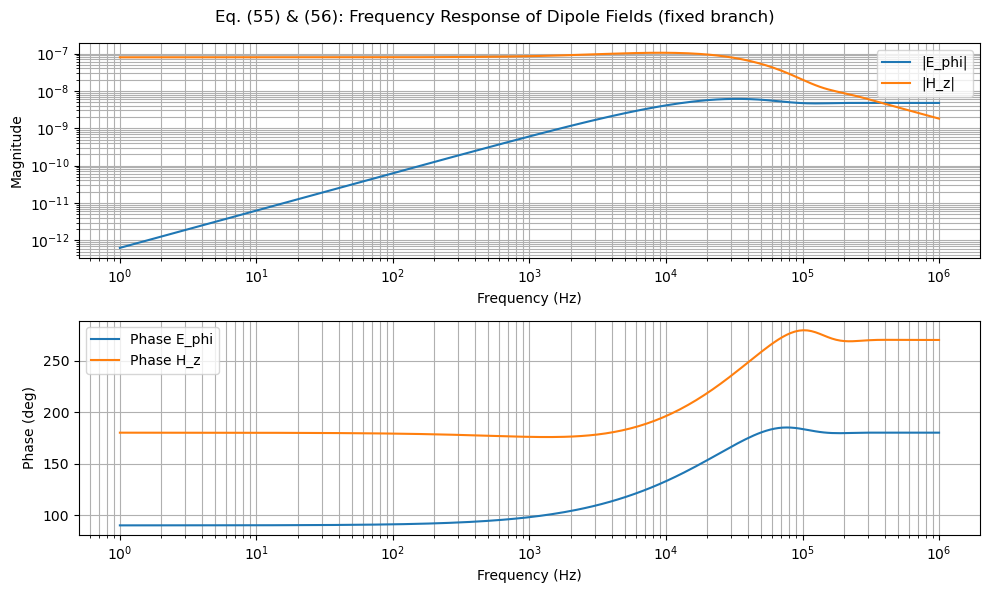

In [11]:
import numpy as np
import matplotlib.pyplot as plt

m = 1.0
rho = 100.0
sigma = 0.01
mu0 = 4*np.pi*1e-7
eps0 = 8.854e-12

freqs = np.logspace(0, 6, 200)
omega = 2*np.pi*freqs
k = np.sqrt(1j * omega * mu0 * sigma)
k = np.where(np.imag(k) > 0, -k, k)
Ephi = (-m/(2*np.pi*rho**4)) * (3 - (3 + 3j*k*rho - (k*rho)**2)*np.exp(-1j*k*rho))
Hz = (m/(2*np.pi*k**2*rho**5)) * (9 - (9 + 9j*k*rho - 4*(k*rho)**2 - 1j*(k*rho)**3)*np.exp(-1j*k*rho))
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.loglog(freqs, np.abs(Ephi), label="|E_phi|")
plt.loglog(freqs, np.abs(Hz), label="|H_z|")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True, which="both")
plt.subplot(2,1,2)
phase_E = np.unwrap(np.angle(Ephi)) * 180/np.pi
phase_H = np.unwrap(np.angle(Hz)) * 180/np.pi
plt.semilogx(freqs, phase_E, label="Phase E_phi")
plt.semilogx(freqs, phase_H, label="Phase H_z")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (deg)")
plt.legend()
plt.grid(True, which="both")
plt.suptitle("Eq. (55) & (56): Frequency Response of Dipole Fields (fixed branch)")
plt.tight_layout()
plt.show()



At low frequencies ($<1$ kHz), the vertical magnetic field $|H_z|$ dominates and remains nearly constant while the azimuthal electric field $|E_\phi|$ is very weak and phase-shifted by about $90^\circ$, reflecting a diffusion-controlled regime. As frequency increases ($10^3$–$10^4$ Hz), $|E_\phi|$ rises and peaks while $|H_z|$ stays nearly flat, indicating strong inductive coupling; the phases of both fields begin to shift, marking the transition toward wave-like behavior. At high frequencies ($>10^5$ Hz), both fields decay in magnitude due to reduced skin depth in the conductive half-space, with phases approaching $\sim 180^\circ$ for $E_\phi$ and $\sim 270^\circ$ for $H_z$. This behavior is consistent with electromagnetic induction in a conducting Earth: diffusion at low frequency, peak response at intermediate frequency, and strong attenuation at high frequency.



We consider the fields produced by a **vertical magnetic dipole (VMD)** located at the surface of a **homogeneous half-space** with conductivity $\sigma$.  

The frequency-domain fields can be written as Hankel integrals.

---

### **Azimuthal Electric Field (Eq. 49)**

$$
E_\phi(\rho) = - \frac{i \omega m}{2 \pi} 
\int_{0}^{\infty} \frac{\lambda^{2}}{\lambda + u} J_{1}(\lambda \rho) \, d\lambda
\tag{49}
$$

- $m$ = dipole moment  
- $\omega = 2 \pi f$ = angular frequency  
- $J_1$ = Bessel function of order 1  
- $u = \sqrt{\lambda^2 + i \omega \mu_0 \sigma}$ = complex vertical wavenumber  

---

### **Radial Magnetic Field (Eq. 50)**

$$
H_\rho(\rho) = \frac{m}{2 \pi} 
\int_{0}^{\infty} \frac{\lambda^{2} u}{\lambda + u} J_{1}(\lambda \rho) \, d\lambda
\tag{50}
$$

This is the radial component of the magnetic field generated by the dipole.  

---

### **Vertical Magnetic Field (Eq. 51)**

$$
H_z(\rho) = \frac{m}{2 \pi} 
\int_{0}^{\infty} \frac{\lambda^{3}}{\lambda + u} J_{0}(\lambda \rho) \, d\lambda
\tag{51}
$$

Here $J_0$ is the Bessel function of order 0.  

---

C:\Users\sadra\AppData\Local\Temp\ipykernel_11216\3152616314.py:28: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  Ephi_val = -1j * omega * m / (2 * np.pi) * quad(lambda lam: integrand_Ephi(lam, rho), 0, np.inf, limit=200)[0]
C:\Users\sadra\AppData\Local\Temp\ipykernel_11216\3152616314.py:29: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Hrho_val = m / (2 * np.pi) * quad(lambda lam: integrand_Hrho(lam, rho), 0, np.inf, limit=200)[0]
C:\Users\sadra\AppData\Local\Temp\ipykernel_11216\3152616314.py:30: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best

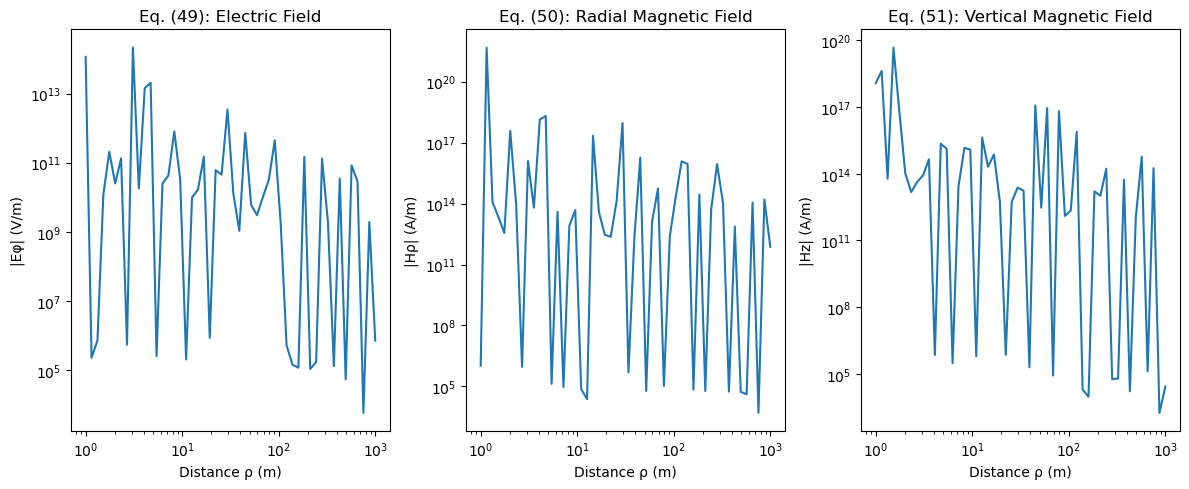

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import jv  
mu0 = 4 * np.pi * 1e-7     
sigma = 0.01               
freq = 100.0              
omega = 2 * np.pi * freq   # angular frequency
m = 1.0                    # dipole moment 
rhos = np.logspace(0, 3, 50)  # observation distances 

# Define u(lambda)
def u_val(lam):
    return np.sqrt(lam**2 + 1j * omega * mu0 * sigma)

def integrand_Ephi(lam, rho):
    return (lam**2 / (lam + u_val(lam))) * jv(1, lam * rho)

def integrand_Hrho(lam, rho):
    return (lam**2 * u_val(lam) / (lam + u_val(lam))) * jv(1, lam * rho)

def integrand_Hz(lam, rho):
    return (lam**3 / (lam + u_val(lam))) * jv(0, lam * rho)

Ephi, Hrho, Hz = [], [], []

for rho in rhos:
    Ephi_val = -1j * omega * m / (2 * np.pi) * quad(lambda lam: integrand_Ephi(lam, rho), 0, np.inf, limit=200)[0]
    Hrho_val = m / (2 * np.pi) * quad(lambda lam: integrand_Hrho(lam, rho), 0, np.inf, limit=200)[0]
    Hz_val   = m / (2 * np.pi) * quad(lambda lam: integrand_Hz(lam, rho), 0, np.inf, limit=200)[0]

    Ephi.append(Ephi_val)
    Hrho.append(Hrho_val)
    Hz.append(Hz_val)

Ephi, Hrho, Hz = np.array(Ephi), np.array(Hrho), np.array(Hz)
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
plt.loglog(rhos, np.abs(Ephi))
plt.xlabel("Distance ρ (m)")
plt.ylabel("|Eφ| (V/m)")
plt.title("Eq. (49): Electric Field")

plt.subplot(1,3,2)
plt.loglog(rhos, np.abs(Hrho))
plt.xlabel("Distance ρ (m)")
plt.ylabel("|Hρ| (A/m)")
plt.title("Eq. (50): Radial Magnetic Field")

plt.subplot(1,3,3)
plt.loglog(rhos, np.abs(Hz))
plt.xlabel("Distance ρ (m)")
plt.ylabel("|Hz| (A/m)")
plt.title("Eq. (51): Vertical Magnetic Field")

plt.tight_layout()
plt.show()


I know that the outputs, plots, and integral calculations are incorrect and need improvement!!!!

# Calculating the surface reflection coefficients for TE and TM plane waves incident on a layered Earth (Eqs. 4.20–4.26)

This section implements and explains the standard bottom-up recursion to compute the **surface reflection coefficients** for TE and TM plane waves incident on a layered Earth.  
These are the formulas in Ward & Hohmann (chapter 4): Eqs. (4.20)–(4.26) (plus supporting definitions (4.27)–(4.30)).

---

## Key Equations

**TM reflection coefficient at the surface**

$$
r_{TM} = \frac{Z_0 - \widehat{Z}_1}{Z_0 + \widehat{Z}_1}
\tag{4.20}
$$

**TE reflection coefficient at the surface**

$$
r_{TE} = \frac{Y_0 - \widehat{Y}_1}{Y_0 + \widehat{Y}_1}
\tag{4.19}
$$

Free-space reference quantities (using hats for the frequency-domain multipliers):

$$
\hat{z}_0 = i\omega\mu_0, \qquad \hat{y}_0 = i\omega\epsilon_0
$$

$$
Y_0 = \frac{\mu_0}{\hat{z}_0}, \qquad Z_0 = \frac{\mu_0}{\hat{y}_0}
$$

Layer quantities (for layer $n$):

$$
k_n^2 = \omega^2 \mu_n \epsilon_n - i\omega \mu_n \sigma_n
\tag{4.30}
$$

$$
u_n = \sqrt{\lambda^2 - k_n^2}
\tag{4.29}
$$

$$
Y_n = \frac{u_n}{\hat{z}_n}, \qquad Z_n = \frac{u_n}{\hat{y}_n}
\tag{4.27–4.28}
$$

with $\hat{z}_n = i\omega\mu_n$ and $\hat{y}_n = i\omega\epsilon_n + \sigma_n$.

---

## Bottom-Up Recursion

Start from the deepest layer and move upward:

$$
\widehat{Y}_N = Y_N, \qquad
\widehat{Y}_n = Y_n \, \frac{\widehat{Y}_{n+1} + Y_n \tanh(u_n h_n)}{Y_n + \widehat{Y}_{n+1}\tanh(u_n h_n)}
\tag{4.25}
$$

and similarly for $\widehat{Z}_n$:

$$
\widehat{Z}_N = Z_N, \qquad
\widehat{Z}_n = Z_n \, \frac{\widehat{Z}_{n+1} + Z_n \tanh(u_n h_n)}{Z_n + \widehat{Z}_{n+1}\tanh(u_n h_n)}
\tag{4.26}
$$

Finally plug $\widehat{Y}_1, \widehat{Z}_1$ into $r_{TE}, r_{TM}$.

---

## Algorithm 

1. Choose angular frequency $\omega = 2\pi f$ and a horizontal wavenumber $\lambda$ (or an array of $\lambda$ values).  
2. For each layer $n$ (with thickness $h_n$, conductivity $\sigma_n$, relative permittivity $\epsilon_{r,n}$, relative permeability $\mu_{r,n}$):
   - Compute $\epsilon_n = \epsilon_{r,n}\,\epsilon_0$, $\mu_n = \mu_{r,n}\,\mu_0$.
   - Compute $k_n^2 = \omega^2\mu_n\epsilon_n - i\omega\mu_n\sigma_n$.
   - Compute $u_n = \sqrt{\lambda^2 - k_n^2}$ — choose the branch so that fields decay away from the source (enforce $\mathrm{Re}(u_n) \geq 0$).
   - Compute $Y_n = u_n / \hat{z}_n$ and $Z_n = u_n / \hat{y}_n$, where $\hat{z}_n = i\omega\mu_n$, $\hat{y}_n = i\omega\epsilon_n + \sigma_n$.
3. Start recursion: set $\widehat{Y}_{N} = Y_N$ and $\widehat{Z}_{N} = Z_N$.
4. For layers $n = N-1 \rightarrow 1$: update
   $$
   \widehat{Y}_n = Y_n \frac{\widehat{Y}_{n+1} + Y_n\tanh(u_n h_n)}{Y_n + \widehat{Y}_{n+1}\tanh(u_n h_n)}.
   $$
   (and similarly for $\widehat{Z}_n$).
   - **Stability tip**: when $u_n h_n$ is large, $\tanh(u_n h_n)\to 1$ and cancellation/loss of precision can occur. In that case compute $\tanh$ via
     $$
     \tanh(u h) = \frac{1 - e^{-2 u h}}{1 + e^{-2 u h}}
     $$
     or directly use the algebraic exponential form.
5. Compute $r_{TE}$ and $r_{TM}$ using the surface $\widehat{Y}_1, \widehat{Z}_1$.


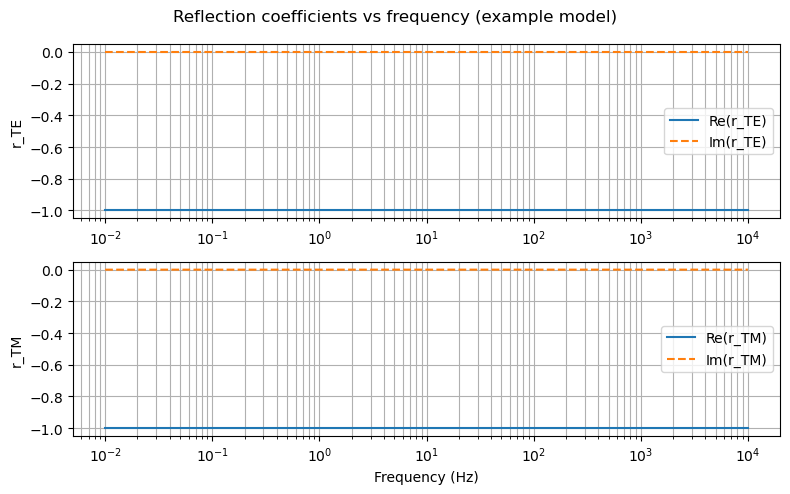

In [17]:
# Reflection coefficients: standalone implementation for notebook
import numpy as np
import matplotlib.pyplot as plt

mu0 = 4.0*np.pi*1e-7
eps0 = 8.854187817e-12

def reflection_coefficients(lambda_vals, freq, thicknesses, sigma_layers, epsr_layers, mur_layers, use_exp=False):
    """
    Compute r_TE and r_TM for layered earth (Eqs. 4.20-4.26).
    - lambda_vals: scalar or 1D array (horizontal wavenumber(s), 1/m)
    - freq: frequency (Hz)
    - thicknesses: list length N-1 (top N-1 layer thicknesses in m)
    - sigma_layers: list length N (S/m)
    - epsr_layers: list length N (relative permittivity)
    - mur_layers: list length N (relative permeability)
    - use_exp: use exp(-2 u h) stable form for tanh
    Returns: (rTE_array, rTM_array) numpy arrays
    """
    omega = 2.0*np.pi*freq
    N = len(sigma_layers)
    sigma = np.array(sigma_layers, dtype=complex)
    eps = np.array(epsr_layers, dtype=float) * eps0
    mu = np.array(mur_layers, dtype=float) * mu0
    hat_z = 1j * omega * mu       # i ω μ_n
    hat_y = 1j * omega * eps + sigma  # i ω ε_n + σ_n

    lambda_vals = np.atleast_1d(lambda_vals)
    rTE = np.zeros_like(lambda_vals, dtype=complex)
    rTM = np.zeros_like(lambda_vals, dtype=complex)
    k2 = omega**2 * mu * eps - 1j * omega * mu * sigma

    for idx, lam in enumerate(lambda_vals):
        u = np.sqrt(lam**2 - k2)  # numpy complex sqrt

        u = np.where(np.real(u) < 0, -u, u)
        Y = u / hat_z     # TE admittance
        Z = u / hat_y     # TM impedance
        hatY = Y[-1]
        hatZ = Z[-1]
        for n in range(N-2, -1, -1):
            un = u[n]
            Yn = Y[n]
            Zn = Z[n]
            hn = thicknesses[n]  # thickness of layer n (top layer index 0)
            if use_exp:
                s = np.exp(-2.0 * un * hn)
                th = (1.0 - s) / (1.0 + s)
            else:
                th = np.tanh(un * hn)

            hatY = Yn * (hatY + Yn * th) / (Yn + hatY * th)
            hatZ = Zn * (hatZ + Zn * th) / (Zn + hatZ * th)

        hat_z0 = 1j * omega * mu0
        hat_y0 = 1j * omega * eps0
        Y0 = mu0 / hat_z0
        Z0 = mu0 / hat_y0

        rTE[idx] = (Y0 - hatY) / (Y0 + hatY)
        rTM[idx] = (Z0 - hatZ) / (Z0 + hatZ)

    return rTE, rTM

if __name__ == "__main__":
    thicknesses = [10.0]                 # top layer thickness (m)
    sigma_layers = [1e-12, 1.0/100.0]    # top: ~air, bottom: 100 ohm·m
    epsr_layers = [1.0, 1.0]
    mur_layers = [1.0, 1.0]

    lambda0 = 2.0*np.pi / 100.0          # horizontal wavenumber ~ 100 m wavelength
    freqs = np.logspace(-2, 4, 200)      # 0.01 Hz -> 10 kHz

    rTE_vals = np.zeros_like(freqs, dtype=complex)
    rTM_vals = np.zeros_like(freqs, dtype=complex)

    for i, f in enumerate(freqs):
        rTE, rTM = reflection_coefficients(lambda0, f, thicknesses, sigma_layers, epsr_layers, mur_layers, use_exp=True)
        rTE_vals[i] = rTE[0]
        rTM_vals[i] = rTM[0]

    import matplotlib.pyplot as plt
    plt.figure(figsize=(8,5))
    plt.subplot(2,1,1)
    plt.semilogx(freqs, rTE_vals.real, label='Re(r_TE)')
    plt.semilogx(freqs, rTE_vals.imag, '--', label='Im(r_TE)')
    plt.ylabel('r_TE'); plt.legend(); plt.grid(True,which='both')
    plt.subplot(2,1,2)
    plt.semilogx(freqs, rTM_vals.real, label='Re(r_TM)')
    plt.semilogx(freqs, rTM_vals.imag, '--', label='Im(r_TM)')
    plt.ylabel('r_TM'); plt.xlabel('Frequency (Hz)'); plt.legend(); plt.grid(True,which='both')
    plt.suptitle('Reflection coefficients vs frequency (example model)')
    plt.tight_layout()
    plt.show()
